# Supervised vs Unsupervised Learning

## Introduction

In this notebook, we will explore the concepts of supervised and unsupervised learning, two major paradigms in machine learning. We will define each type of learning, discuss their applications, and provide code examples to illustrate how they work. Finally, we will compare the two approaches and draw conclusions about their relative strengths and weaknesses.



## Supervised Learning

Supervised learning is a type of machine learning where the model is trained on labeled data. This means that each training example includes an input and a known output. The goal is for the model to learn a mapping from inputs to outputs that can be applied to new, unseen data. Common applications of supervised learning include classification and regression tasks.

### Example of Supervised Learning

Let's demonstrate supervised learning using a binary classification task with the Breast Cancer Wisconsin (Diagnostic) dataset.


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



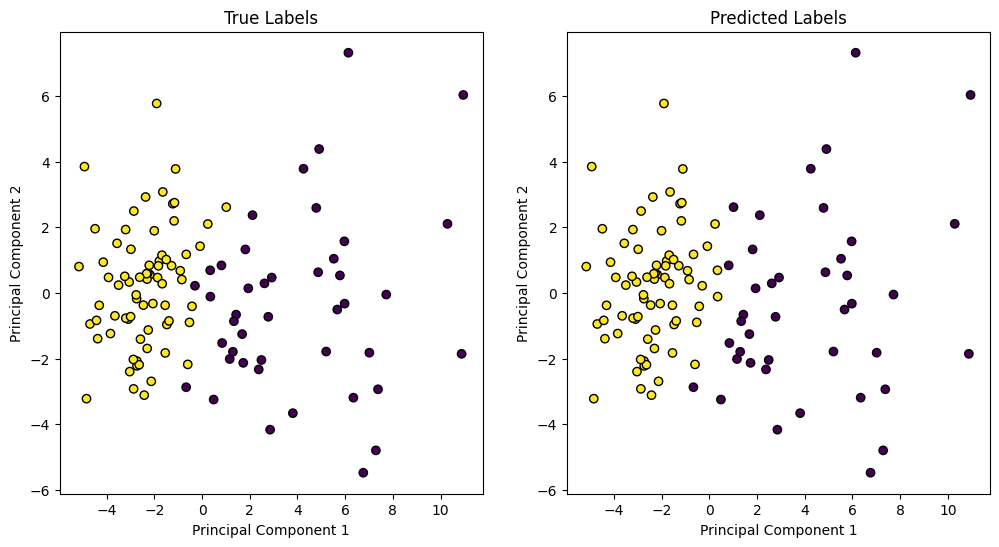

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the true labels vs predicted labels
plt.figure(figsize=(12, 6))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.title('True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
plt.title('Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


## Unsupervised Learning
Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. The goal is to identify underlying patterns or structures in the data without any prior knowledge of the outcomes. Common applications of unsupervised learning include clustering and dimensionality reduction.

### Example of Unsupervised Learning
Let's demonstrate unsupervised learning using a clustering task with the Breast Cancer Wisconsin (Diagnostic) dataset.

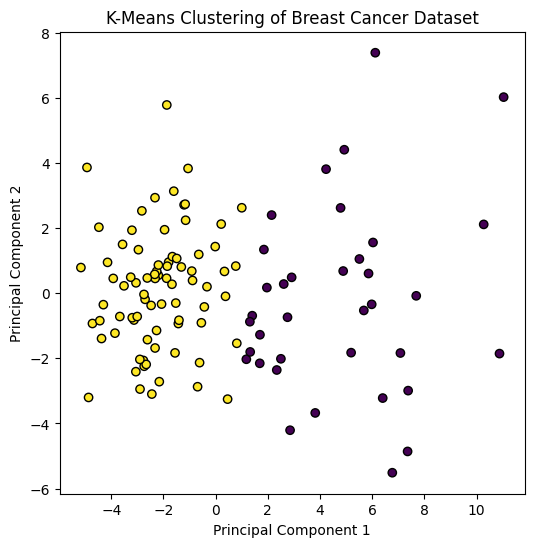

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
X = data.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into the same training and testing sets as in supervised learning
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_test_pca)

# Predict cluster labels
cluster_labels = kmeans.predict(X_test_pca)

# Adjust cluster labels to match true labels as closely as possible
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
for i in range(2):
    mask = (cluster_labels == i)
    labels[mask] = mode(y_test[mask])[0]

# Plot the clustering results
plt.figure(figsize=(6, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Combined Plot for Comparison


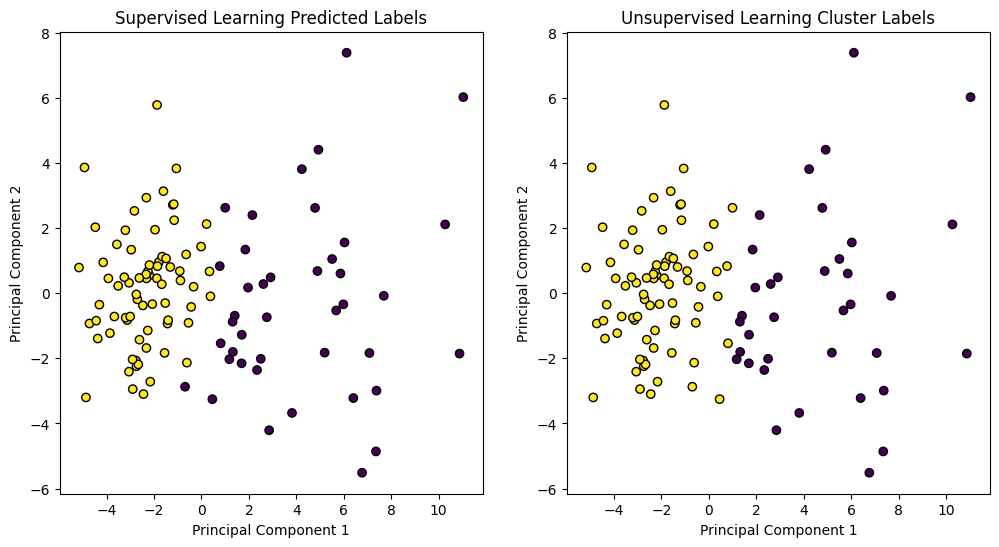

In [32]:
# Combined plot for comparison
plt.figure(figsize=(12, 6))

# Supervised learning predicted labels
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
plt.title('Supervised Learning Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Unsupervised learning cluster labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('Unsupervised Learning Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


## Comparison of Supervised and Unsupervised Learning
Both supervised and unsupervised learning have their unique strengths and are suited for different types of tasks. Here are some key points of comparison:

### Data Requirements:

- Supervised learning requires labeled data, which can be expensive and time-consuming to obtain.
- Unsupervised learning does not require labeled data, making it more applicable to situations where labels are not available.

### Goals:

- Supervised learning aims to learn a mapping from inputs to known outputs, making it well-suited for prediction tasks.
- Unsupervised learning aims to discover hidden patterns or structures in the data, making it useful for exploratory data analysis.

### Applications:

- Common applications of supervised learning include classification (e.g., spam detection) and regression (e.g., predicting house prices).
- Common applications of unsupervised learning include clustering (e.g., customer segmentation) and dimensionality reduction (e.g., principal component analysis).

### Evaluation:

The performance of supervised learning models can be directly measured using metrics such as accuracy, precision, recall, and F1-score.
### Evaluating unsupervised learning models can be more challenging and often requires domain knowledge or additional methods such as silhouette scores for clustering.

# Conclusion
Supervised and unsupervised learning are fundamental approaches in the field of machine learning, each with distinct methodologies and applications. Supervised learning is powerful for prediction tasks where labeled data is available, while unsupervised learning is invaluable for discovering hidden structures in unlabeled data. Understanding the differences and appropriate use cases for each approach is crucial for effectively applying machine learning techniques to real-world problems.